In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matricesAleatorias import matwishart as ws

In [3]:
Nmat = 1000
Tmat = 10000
mat = ws.MatrizWishart((Nmat,Tmat))
densidad = ws.Densidades((Nmat,Tmat),1000,2)

In [5]:
WUEmat = mat.WUE()

In [7]:
EvalsWUE = np.linalg.eigvalsh(WUEmat)

In [9]:
x, y = densidad.MarchenkoPastur()

In [11]:
rWUE= (EvalsWUE[1:-1] - EvalsWUE[2:]) / (EvalsWUE[:-2] - EvalsWUE[1:-1])

In [13]:
r = np.linspace(0,10,1000)
pr = densidad.Pr(r)

In [15]:
nsamp = 100000
N = 100
T = 1000

In [17]:
ensWUE = ws.MatrizWishart((N,T))
EnsEvalWUE = []

In [19]:
for i in range(nsamp):
    WUE = ensWUE.WUE()
    eval = np.linalg.eigvalsh(WUE)
    EnsEvalWUE.append(eval)

In [21]:
EnsEvalWUE = np.concatenate(EnsEvalWUE)

In [23]:
rens = []

In [25]:
for i in range(int(nsamp / N)):
    EvalSamp = EnsEvalWUE[0 + i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [27]:
rens = np.concatenate(rens)

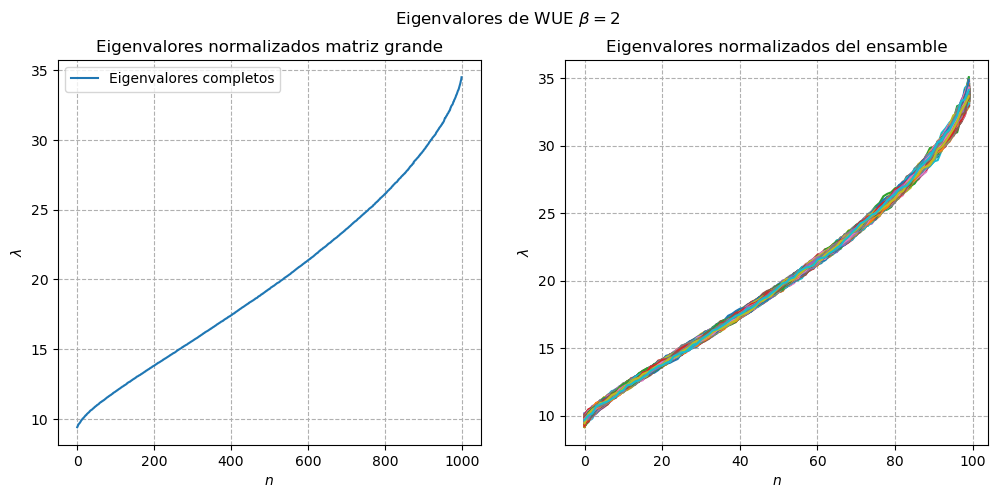

In [31]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Eigenvalores de WUE $ \beta=2 $')

ax[0].plot(EvalsWUE,label='Eigenvalores completos')
ax[0].set_title('Eigenvalores normalizados matriz grande')
ax[0].grid(True,linestyle='--')
ax[0].legend()
ax[0].set_xlabel(r'$ n $')
ax[0].set_ylabel(r'$ \lambda $')

for i in range(int(nsamp/N)):
    ax[1].plot(EnsEvalWUE[0+i*100:100 + i*100])
ax[1].set_title('Eigenvalores normalizados del ensamble')
ax[1].grid(True,linestyle='--')
ax[1].set_xlabel(r'$ n $')
ax[1].set_ylabel(r'$ \lambda $')

plt.savefig('EigenvaloresWUE.png',dpi=300)

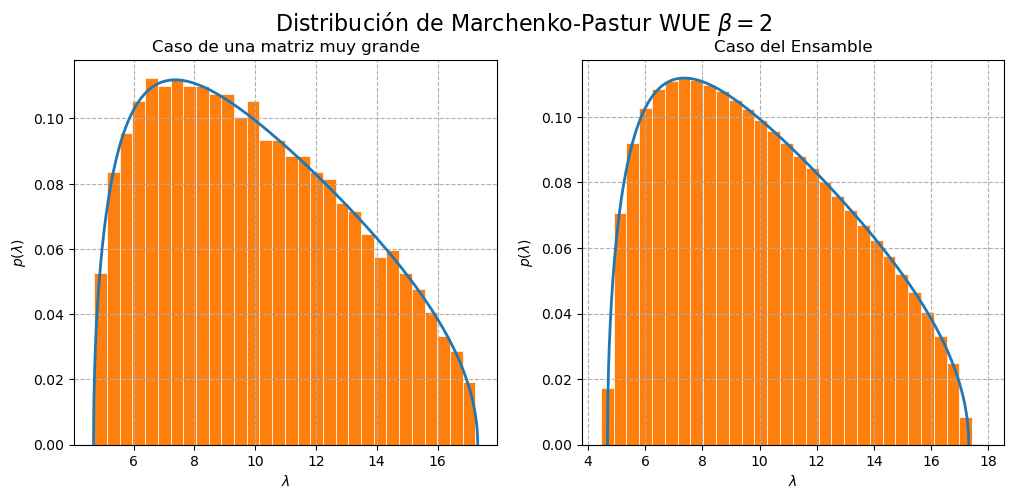

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Distribución de Marchenko-Pastur WUE $ \beta=2 $',fontsize=16)

ax[0].plot(x,y,lw=2)
ax[0].hist(EvalsWUE/2,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ \lambda $')
ax[0].set_ylabel(r'$ p(\lambda) $')

ax[1].plot(x,y,lw=2)
ax[1].hist(EnsEvalWUE/2,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ \lambda $')
ax[1].set_ylabel(r'$ p(\lambda) $')

plt.savefig('Marchenko-PasturWUE.png',dpi=300)

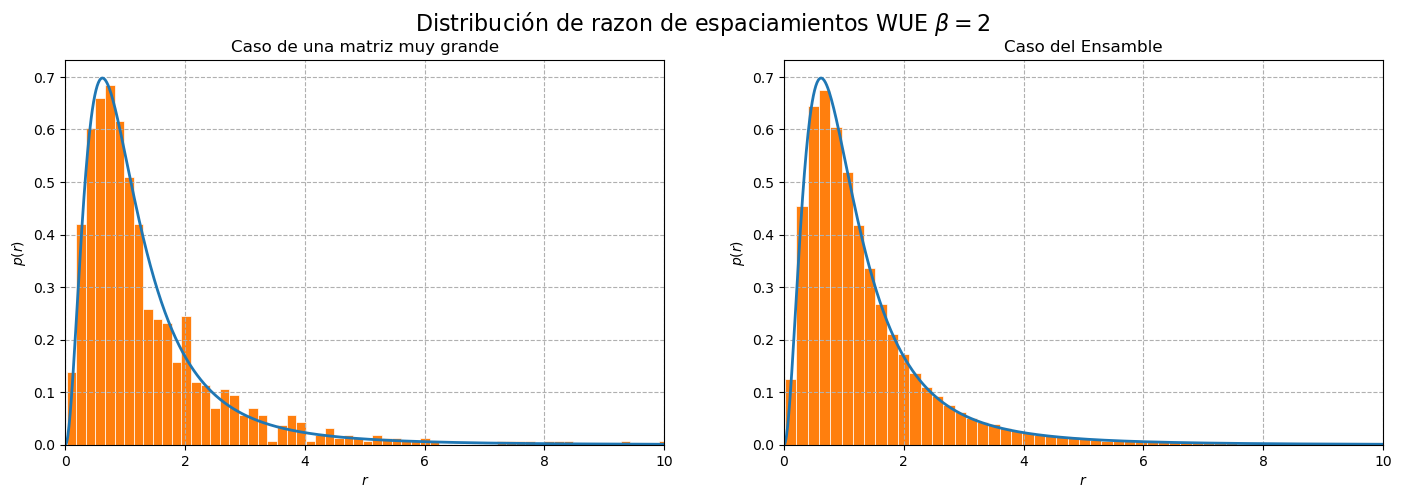

In [51]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Distribución de razon de espaciamientos WUE $ \beta=2 $',fontsize=16)

ax[0].plot(r,pr,lw=2)
ax[0].hist(rWUE,bins=250,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ r $')
ax[0].set_ylabel(r'$ p(r) $')
ax[0].set_xlim(0,10)

ax[1].plot(r,pr,lw=2)
ax[1].hist(rens,bins=400,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ r $')
ax[1].set_ylabel(r'$ p(r) $')
ax[1].set_xlim(0,10)

plt.savefig('prWUE.png',dpi=300)